In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts


# Import API key
from hw_config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [7]:
cities

['east london',
 'hualmay',
 'yellowknife',
 'albany',
 'touros',
 'ozgon',
 'upernavik',
 'silver city',
 'poum',
 'dunedin',
 'mahebourg',
 'semporna',
 'bluff',
 'taltal',
 'dzilam gonzalez',
 'cabo san lucas',
 'korla',
 'atambua',
 'ahipara',
 'negombo',
 'la ronge',
 'port elizabeth',
 'vardo',
 'belmonte',
 'bredasdorp',
 'bethel',
 'bambous virieux',
 'ilulissat',
 'corat',
 'ushuaia',
 'grand river south east',
 'chikwawa',
 'busselton',
 'eydhafushi',
 'butaritari',
 'garowe',
 'pevek',
 'punta arenas',
 'eyl',
 'batticaloa',
 'high prairie',
 'vila franca do campo',
 'port alfred',
 'vaini',
 'ulladulla',
 'ust-koksa',
 'cape town',
 'chokurdakh',
 'longyearbyen',
 'tasiilaq',
 'mataura',
 'yinchuan',
 'hobart',
 'amderma',
 'tiksi',
 'pontianak',
 'nikolskoye',
 'kaitangata',
 'mgachi',
 'yar-sale',
 'saint george',
 'roma',
 'cienfuegos',
 'attawapiskat',
 'provideniya',
 'kapaa',
 'shitanjing',
 'karratha',
 'kadykchan',
 'pombia',
 'new norfolk',
 'aripuana',
 'juegang',

In [66]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="

weather = []  
for city in cities:
    try:
        city_url = base_url + city
        weather_data = requests.get(city_url).json()
        weather.append(weather_data["main"]["temp"])
        print(f"Processing Record of Set 1 | {city}")
    except KeyError:
        print("City not found. Skipping...")

weather

Processing Record of Set 1 | east london
Processing Record of Set 1 | hualmay
Processing Record of Set 1 | yellowknife
Processing Record of Set 1 | albany
Processing Record of Set 1 | touros
City not found. Skipping...
Processing Record of Set 1 | upernavik
Processing Record of Set 1 | silver city
Processing Record of Set 1 | poum
Processing Record of Set 1 | dunedin
Processing Record of Set 1 | mahebourg
Processing Record of Set 1 | semporna
Processing Record of Set 1 | bluff
Processing Record of Set 1 | taltal
Processing Record of Set 1 | dzilam gonzalez
Processing Record of Set 1 | cabo san lucas
Processing Record of Set 1 | korla
Processing Record of Set 1 | atambua
Processing Record of Set 1 | ahipara
Processing Record of Set 1 | negombo
Processing Record of Set 1 | la ronge
Processing Record of Set 1 | port elizabeth
Processing Record of Set 1 | vardo
Processing Record of Set 1 | belmonte
Processing Record of Set 1 | bredasdorp
Processing Record of Set 1 | bethel
Processing Recor

Processing Record of Set 1 | kostomuksha
Processing Record of Set 1 | salinopolis
Processing Record of Set 1 | codrington
Processing Record of Set 1 | deputatskiy
City not found. Skipping...
Processing Record of Set 1 | bago
Processing Record of Set 1 | lubbock
Processing Record of Set 1 | trelew
Processing Record of Set 1 | salima
Processing Record of Set 1 | mecca
Processing Record of Set 1 | berlevag
Processing Record of Set 1 | havelock
Processing Record of Set 1 | pangody
Processing Record of Set 1 | maragogi
Processing Record of Set 1 | taoudenni
Processing Record of Set 1 | tiznit
Processing Record of Set 1 | jinchang
Processing Record of Set 1 | roald
Processing Record of Set 1 | port lincoln
Processing Record of Set 1 | lasa
Processing Record of Set 1 | thohoyandou
Processing Record of Set 1 | ishigaki
Processing Record of Set 1 | brae
Processing Record of Set 1 | tigil
Processing Record of Set 1 | chany
Processing Record of Set 1 | riviere-au-renard
Processing Record of Set 1

Processing Record of Set 1 | muisne
Processing Record of Set 1 | ponta delgada
Processing Record of Set 1 | seoul
Processing Record of Set 1 | sao gabriel da cachoeira
Processing Record of Set 1 | tuy hoa
City not found. Skipping...
Processing Record of Set 1 | sangre grande
Processing Record of Set 1 | pangnirtung
Processing Record of Set 1 | jiuquan
Processing Record of Set 1 | airai
Processing Record of Set 1 | bay roberts
Processing Record of Set 1 | turayf
Processing Record of Set 1 | khani
Processing Record of Set 1 | manzhouli
Processing Record of Set 1 | iranshahr
Processing Record of Set 1 | sri aman
Processing Record of Set 1 | vestmanna
Processing Record of Set 1 | luang prabang
Processing Record of Set 1 | high level
City not found. Skipping...
Processing Record of Set 1 | tokoroa
Processing Record of Set 1 | qasigiannguit
Processing Record of Set 1 | coquimbo
Processing Record of Set 1 | azangaro
Processing Record of Set 1 | ayr
City not found. Skipping...
Processing Recor

[24.3,
 24.07,
 -3.17,
 16.67,
 27,
 -4.47,
 18.45,
 26.69,
 9.32,
 23.13,
 23,
 8.89,
 20.5,
 39.44,
 26.43,
 13.49,
 22.78,
 16.45,
 26.48,
 5,
 20,
 2,
 23,
 13.71,
 14.27,
 23.16,
 -1,
 9,
 6,
 21.72,
 11.36,
 29.87,
 28.39,
 26.36,
 -14.06,
 5.77,
 28.63,
 27.2,
 12.14,
 14,
 26.48,
 28,
 11.08,
 4.41,
 17.18,
 -14.07,
 0,
 0,
 8.89,
 4.44,
 10.03,
 -11.99,
 25.42,
 3.36,
 11.11,
 2.35,
 1.19,
 22.73,
 6.94,
 31.47,
 -6.19,
 25.57,
 4.44,
 27.9,
 14.27,
 9.33,
 26.78,
 12.22,
 6.46,
 24.93,
 -7.19,
 24.86,
 13.65,
 25.83,
 8.14,
 16.55,
 27.68,
 30,
 14,
 26,
 28.66,
 24.66,
 29.29,
 23.21,
 15.99,
 28.62,
 1.63,
 3.64,
 -15.2,
 -11.64,
 5,
 34.71,
 14.05,
 24.35,
 29.64,
 29.05,
 13.44,
 15.15,
 8.12,
 10.56,
 -4.66,
 -5,
 -1.54,
 20.1,
 -11,
 7.07,
 22.33,
 14.18,
 19.35,
 24.84,
 10,
 14,
 32.88,
 26.6,
 28.65,
 29,
 28.45,
 19.85,
 25.27,
 27.83,
 -0.36,
 15.54,
 8,
 15.34,
 22.41,
 20.74,
 13.66,
 30,
 28.31,
 2.79,
 29.13,
 30,
 22.61,
 17,
 23.44,
 13.59,
 15,
 33.56,
 23.1

In [9]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=708763f13df9bb9c009c0d4f6dd4de41&q=miri


In [10]:
weather = []
lat = []           
lng = []           
max_temp = []      
humidity = []      
cloudiness = []     
wind_speed = []    
country = []        
date = []          

for city in cities:
    try:
        city_url = base_url + city 
        weather_data = requests.get(city_url).json()
        weather.append(weather_data["main"]["temp"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        max_temp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        country.append(weather_data["sys"]["country"])
        date.append(weather_data["dt"])
    except KeyError:
        weather.append("NaN")
        lat.append("NaN")
        lng.append("NaN")
        max_temp.append("NaN")
        humidity.append("NaN")
        cloudiness.append("NaN")
        wind_speed.append("NaN")
        country.append("NaN")
        date.append("NaN")

    

In [11]:
print(len(cities))
print(len(weather))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

592
592
592
592
592
592
592
592
592
592


In [12]:
weather_df = pd.DataFrame({"City": cities,
                           "Country": country,
                           "Latitude": lat,
                           "Longitude": lng,
                          "Highest Temperature": max_temp,
                          "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": date
                          })
weather_df.head()

,City,Country,Latitude,Longitude,Highest Temperature,Humidity,Cloudiness,Wind Speed,Date
0,east london,ZA,-33.02,27.91,21.05,66,0,8.13,1587256343
1,hualmay,PE,-11.1,-77.61,21.55,78,29,3.32,1587256413
2,yellowknife,CA,62.46,-114.35,-2,92,90,4.6,1587256205
3,albany,US,42.6,-73.97,6.11,72,76,5.15,1587256332
4,touros,BR,-5.2,-35.46,26,94,75,1,1587256315


In [13]:
#check to see if Humidity is > 100.
humid = weather_df["Humidity"]

for i in humid:
    try:
        if int(i) > 100:
            print(i)
    except ValueError:
        pass

In [14]:
clean_weather_df = weather_df.dropna()
clean_weather_df

,City,Country,Latitude,Longitude,Highest Temperature,Humidity,Cloudiness,Wind Speed,Date
0,east london,ZA,-33.02,27.91,21.05,66,0,8.13,1587256343
1,hualmay,PE,-11.1,-77.61,21.55,78,29,3.32,1587256413
2,yellowknife,CA,62.46,-114.35,-2,92,90,4.6,1587256205
3,albany,US,42.6,-73.97,6.11,72,76,5.15,1587256332
4,touros,BR,-5.2,-35.46,26,94,75,1,1587256315
...,...,...,...,...,...,...,...,...,...
587,moville,US,42.49,-96.07,21,49,1,11.3,1587256675
588,cartagena del chaira,CO,1.33,-74.84,20.68,84,86,2.23,1587256675
589,krasnoselkup,RU,65.7,82.47,3.21,83,100,11.15,1587256454
590,manavalakurichi,IN,8.13,77.3,29,79,75,2.6,1587256676


In [15]:
clean_weather_df.to_csv("../../CSV_files/clean_weather_data.csv", index = True)

In [16]:
averages = clean_weather_df[["Latitude", "Longitude", "Highest Temperature", "Humidity", "Cloudiness", "Wind Speed", "Date"]].astype("float").mean()

In [17]:
count = clean_weather_df[["Latitude", "Longitude", "Highest Temperature", "Humidity", "Cloudiness", "Wind Speed", "Date"]].astype("float").count()

In [18]:
std = clean_weather_df[["Latitude", "Longitude", "Highest Temperature", "Humidity", "Cloudiness", "Wind Speed", "Date"]].astype("float").std()

In [19]:
min_value = clean_weather_df[["Latitude", "Longitude", "Highest Temperature", "Humidity", "Cloudiness", "Wind Speed", "Date"]].astype("float").min()

In [20]:
max_value = clean_weather_df[["Latitude", "Longitude", "Highest Temperature", "Humidity", "Cloudiness", "Wind Speed", "Date"]].astype("float").max()

In [22]:
stats_df = pd.DataFrame({"count": count,
                        "mean": averages,
                        "std": std,
                        "min": min_value,
                        "max": max_value}).T
stats_df

,Latitude,Longitude,Highest Temperature,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.656636,16.694779,15.746654,71.055147,53.522059,3.636397,1.587256e+09
std,33.011727,90.296847,11.448424,19.506544,36.494298,2.290709,1.188179e+02
min,-54.800000,-175.200000,-18.080000,9.000000,0.000000,0.100000,1.587256e+09
max,78.220000,179.320000,38.320000,100.000000,100.000000,16.000000,1.587257e+09


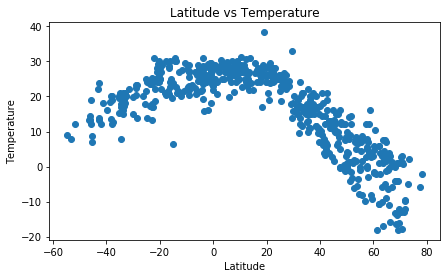

In [52]:
# Latitude vs Temperature 

lat_data = clean_weather_df["Latitude"]
temp_data = clean_weather_df["Highest Temperature"]

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(lat_data, temp_data, marker = "o", alpha = 1)

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.show()

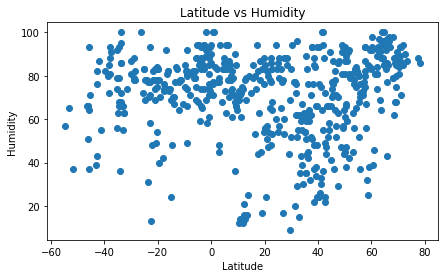

In [53]:
# Latitude vs Humidity 

humid_data = clean_weather_df["Humidity"]

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(lat_data, humid_data, marker = "o", alpha = 1)

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

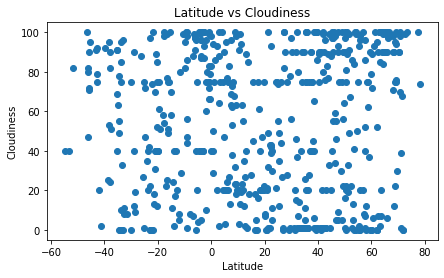

In [54]:
# Latitude vs Cloudiness

cloud_data = clean_weather_df["Cloudiness"]

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(lat_data, cloud_data, marker = "o", alpha = 1)

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

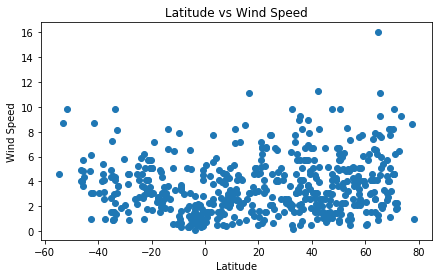

In [55]:
# Latitude vs Wind Speed

wind_data = clean_weather_df["Wind Speed"]

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(lat_data, wind_data, marker = "o", alpha = 1)

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

In [56]:
# north and south hemispheres:

north_df = clean_weather_df.loc[(clean_weather_df["Longitude"].astype(float) > 0)]

south_df = clean_weather_df.loc[(clean_weather_df["Longitude"].astype(float) < 0)]


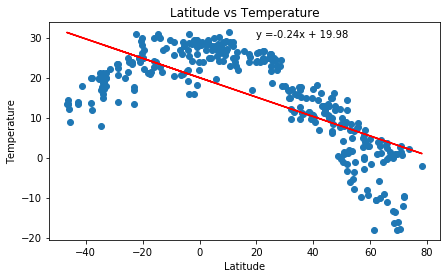

The r_squared value is 0.5.


In [57]:
#northern hemisphere- max temp vs lat
north_lat = north_df["Latitude"].astype(float)
north_temp = north_df["Highest Temperature"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(north_lat, north_temp, marker = "o", alpha = 1)

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

slope, intercept, r_value, p_value, std_err = sts.linregress(north_lat, north_temp)
r_squared = round(r_value**2, 2)
regress_values = north_lat*slope + intercept
north_lat_temp_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_lat, regress_values, "r-")
plt.annotate(north_lat_temp_eq, (20, 30), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

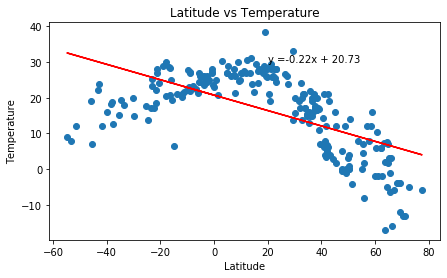

The r_squared value is 0.38.


In [58]:
#southern hemisphere- max temp vs lat
south_lat = south_df["Latitude"].astype(float)
south_temp = south_df["Highest Temperature"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(south_lat, south_temp, marker = "o", alpha = 1)

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

slope, intercept, r_value, p_value, std_err = sts.linregress(south_lat, south_temp)
r_squared = round(r_value**2, 2)
regress_values = south_lat*slope + intercept
south_lat_temp_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_lat, regress_values, "r-")
plt.annotate(south_lat_temp_eq, (20, 30), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

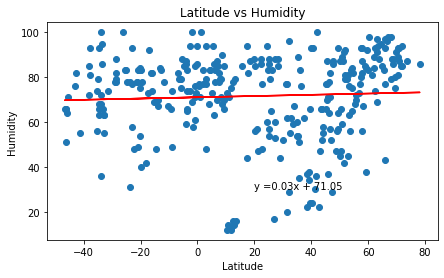

The r_squared value is 0.0.


In [60]:
#north - humidity vs lat
north_lat = north_df["Latitude"].astype(float)
north_humid = north_df["Humidity"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(north_lat, north_humid, marker = "o", alpha = 1)

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

slope, intercept, r_value, p_value, std_err = sts.linregress(north_lat, north_humid)
r_squared = round(r_value**2)
regress_values = north_lat*slope + intercept
north_lat_humid_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_lat, regress_values, "r-")
plt.annotate(north_lat_humid_eq, (20, 30), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

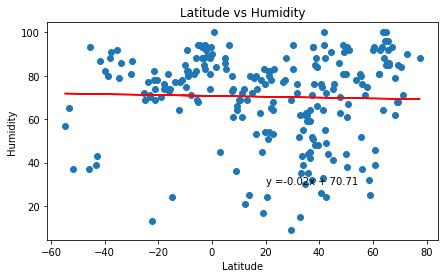

The r_squared value is 0.0.


In [61]:
south_lat = south_df["Latitude"].astype(float)
south_humid = south_df["Humidity"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(south_lat, south_humid, marker = "o", alpha = 1)

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

slope, intercept, r_value, p_value, std_err = sts.linregress(south_lat, south_humid)
r_squared = round(r_value**2, 2)
regress_values = south_lat*slope + intercept
south_lat_humid_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_lat, regress_values, "r-")
plt.annotate(south_lat_humid_eq, (20, 30), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

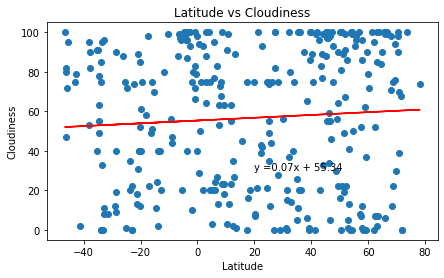

The r_squared value is 0.0.


In [62]:
#north = cloudiness
north_lat = north_df["Latitude"].astype(float)
north_cloud = north_df["Cloudiness"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(north_lat, north_cloud, marker = "o", alpha = 1)

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

slope, intercept, r_value, p_value, std_err = sts.linregress(north_lat, north_cloud)
r_squared = round(r_value**2, 2)
regress_values = north_lat*slope + intercept
north_lat_cloud_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_lat, regress_values, "r-")
plt.annotate(north_lat_cloud_eq, (20, 30), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

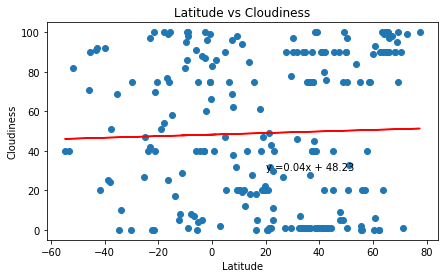

The r_squared value is 0.0.


In [63]:
south_lat = south_df["Latitude"].astype(float)
south_cloud = south_df["Cloudiness"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(south_lat, south_cloud, marker = "o", alpha = 1)

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

slope, intercept, r_value, p_value, std_err = sts.linregress(south_lat, south_cloud)
r_squared = round(r_value**2, 2)
regress_values = south_lat*slope + intercept
south_lat_cloud_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_lat, regress_values, "r-")
plt.annotate(south_lat_cloud_eq, (20, 30), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

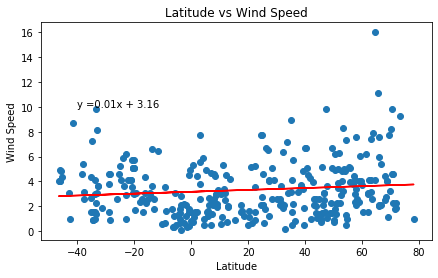

The r_squared value is 0.01.


In [64]:
#north - wind speed
north_lat = north_df["Latitude"].astype(float)
north_wind = north_df["Wind Speed"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(north_lat, north_wind, marker = "o", alpha = 1)

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

slope, intercept, r_value, p_value, std_err = sts.linregress(north_lat, north_wind)
r_squared = round(r_value**2, 2)
regress_values = north_lat*slope + intercept
north_lat_wind_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(north_lat, regress_values, "r-")
plt.annotate(north_lat_wind_eq, (-40, 10), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")

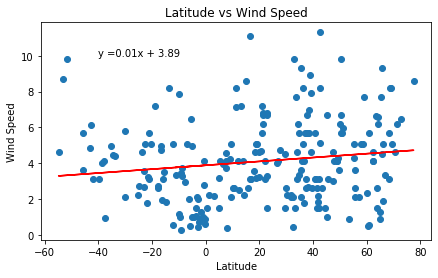

The r_squared value is 0.02.


In [65]:
south_lat = south_df["Latitude"].astype(float)
south_wind = south_df["Wind Speed"].astype(float)

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(south_lat, south_wind, marker = "o", alpha = 1)

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

slope, intercept, r_value, p_value, std_err = sts.linregress(south_lat, south_wind)
r_squared = round(r_value**2, 2)
regress_values = south_lat*slope + intercept
south_lat_wind_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(south_lat, regress_values, "r-")
plt.annotate(south_lat_wind_eq, (-40, 10), fontsize = 10, color="black")

plt.show()
print(f"The r_squared value is {r_squared}.")